In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tools import *
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [5, 4]
plt.rcParams['image.aspect']= 'auto'

In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [30]:
from sklearn.datasets import make_moons,make_circles,make_swiss_roll
from model_selection import train_test_split


In [57]:
def plot_boundry(algo,axis,poly_algo = None,alpha = 0.6):
    XX,YY = np.meshgrid(np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)),
                       np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)))
    plot_X = np.c_[XX.ravel(),YY.ravel()]
    if poly_algo is not None:
        poly_algo.fit(plot_X)
        plot_X = poly_algo.transform(plot_X)
    y = algo.predict(plot_X)
    y = y.reshape(XX.shape)
    plt.contourf(XX,YY,y,cmap=plt.cm.winter,alpha=alpha)


def scatter_2d(X,y,alpha =0.5):
    plt.scatter(X[y==0,0],X[y==0,1],c='r',alpha=alpha)
    plt.scatter(X[y==1,0],X[y==1,1],c='b',alpha=alpha)

In [47]:
X,y = make_circles(1000,noise=0.1,factor=0.5)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_ratio=0.1)

In [38]:
X.shape

(1000, 3)

## Voting Classifier

In [49]:
vclf = VotingClassifier(estimators=[
    ('log_clf',LogisticRegression()),
    ('knn_clf',KNeighborsClassifier()),
    ('dt_clf',DecisionTreeClassifier())
],voting='soft')


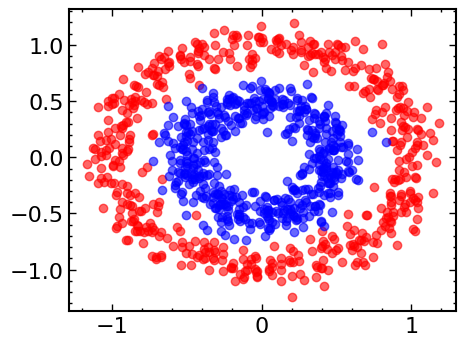

In [48]:
scatter_2d(X,y)

In [51]:
vclf.fit(X_train,y_train)

VotingClassifier(estimators=[('log_clf',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn_clf',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='min...
                              DecisionTreeCl

In [52]:
vclf.score(X_test,y_test)

0.99

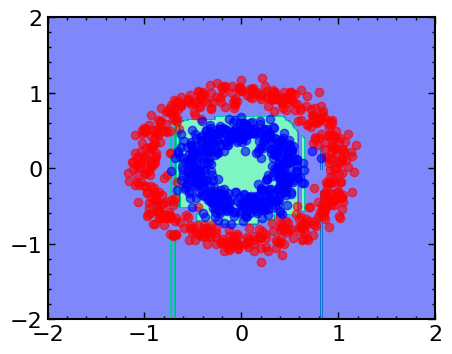

In [53]:
plot_boundry(vclf,[-2,2,-2,2])
scatter_2d(X,y)

## Bagging

In [18]:
from sklearn.ensemble import BaggingClassifier


In [54]:
bclf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=1000,n_jobs=-1,oob_score=True)

In [55]:
bclf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [56]:
bclf.score(X_test,y_test)

1.0

In [57]:
bclf.oob_score_

0.9777777777777777

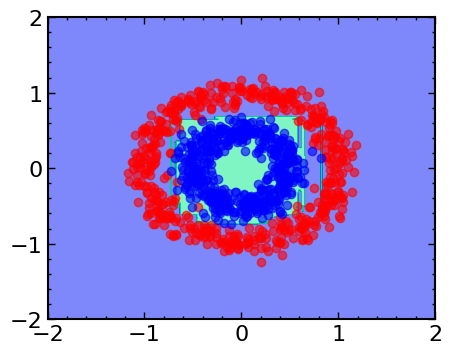

In [58]:
plot_boundry(bclf,[-2,2,-2,2])
scatter_2d(X,y)

## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfclf = RandomForestClassifier(500,n_jobs=-1,oob_score=True,max_leaf_nodes=16)

In [61]:
rfclf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [62]:
rfclf.oob_score_

0.9766666666666667

In [64]:
rfclf.score(X_test,y_test)

0.99

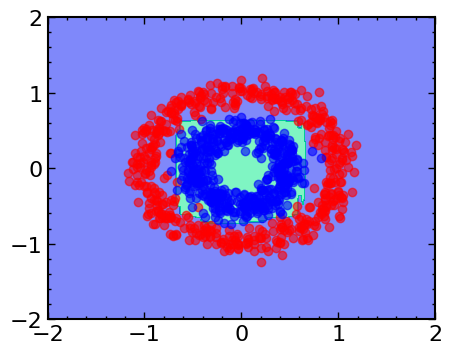

In [63]:
plot_boundry(rfclf,[-2,2,-2,2])
scatter_2d(X,y)

## Ada Boosting